In [9]:
import numpy as np
import matplotlib.pyplot as plt

Randomizing a frequency:

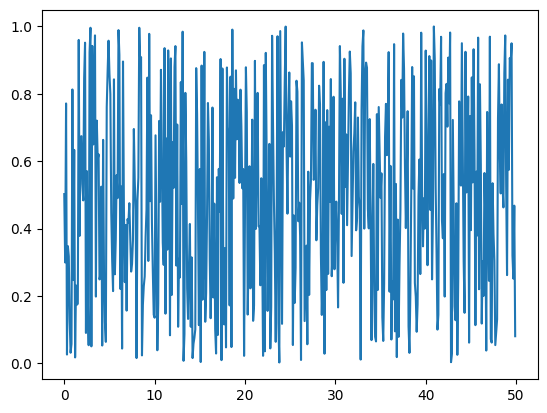

In [23]:
time = np.arange(0, 50, 0.1)

frequency = rng.random(size=time.shape)

plt.plot(time, frequency)
plt.show()

Generating sound with a random frequency for each sample (White Noise):

In [21]:
from IPython.display import Audio

sample_rate = 44100 # Samples per second

duration = 5.0 # Duration in seconds

samples = np.arange(duration * sample_rate)

freq_hz = rng.random(size=samples.shape) # Frequency / pitch of the sine wave

freq_hz *= 0.3 # lower the volume

Audio(freq_hz, rate=sample_rate)

In [ ]:
amplitude = np.sin(samples)

We can generate a simple sine wave in numpy like so:

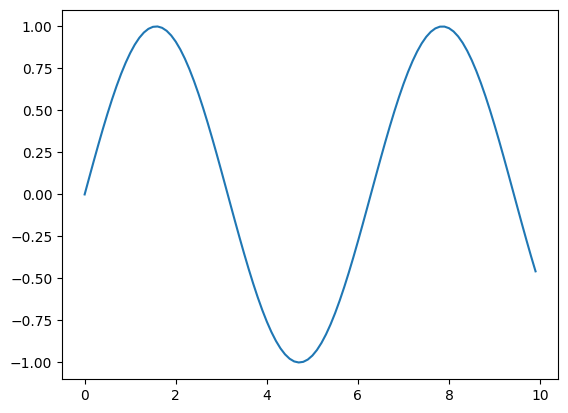

In [25]:
# Get x values of the sine wave
samples = np.arange(0, 10, 0.1) # create an array from 0 to 10 in 0.1 increments

# Amplitude of the sine wave is sine of a variable like samples
amplitude = np.sin(samples)

# Plot a sine wave using samples and amplitude obtained for the sine wave
plt.plot(samples, amplitude)
plt.show()

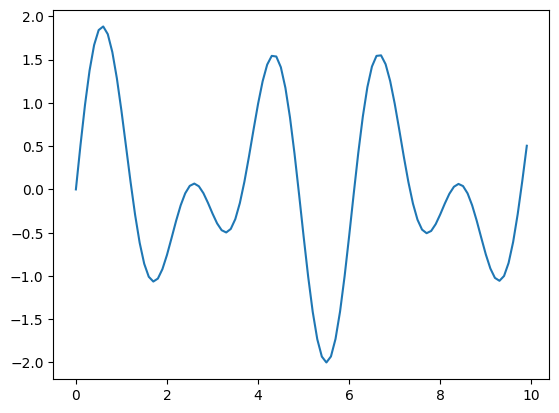

In [33]:
samples = np.arange(0, 10, 0.1)

amplitude = np.sin(2 * samples) + np.sin(np.pi * samples)

plt.plot(samples, amplitude)
plt.show()

Adding some noise to the wave:

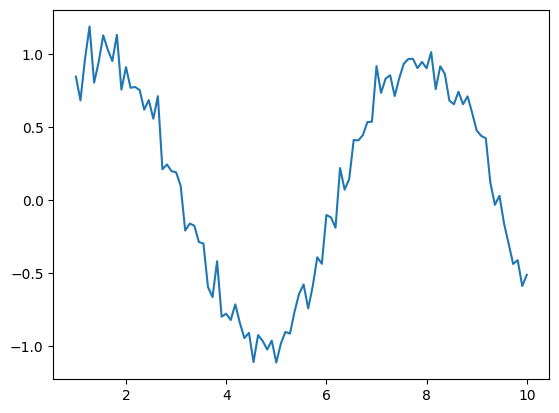

In [16]:
samples = np.linspace(1, 10, num=100) # another way to create an array from 0 to 10 in 0.1 increments

amplitude = np.sin(samples) 

# create a random number generator
rng = np.random.default_rng()

noisy_amplitude = amplitude + rng.normal(scale=0.1, size=amplitude.shape) # Draw random samples from a normal (Gaussian) distribution.

# Plot a sine wave using samples and amplitude obtained for the sine wave
plt.plot(samples, noisy_amplitude)
plt.show()

#### Generate sound

It's possible to use the concept from above to generate sound:

In [19]:
from IPython.display import Audio

sample_rate = 44100 # Samples per second

freq_hz = 400.0 # Frequency / pitch of the sine wave

duration = 5.0 # Duration in seconds

samples = np.arange(duration * sample_rate)

waveform = np.sin(2 * np.pi * samples * freq_hz / sample_rate)

waveform *= 0.3 # lower the volume

# plt.plot(samples/sample_rate, waveform)
# plt.show()

Audio(waveform, rate=sample_rate)

Let's add some noise:

In [18]:
noisy_waveform = waveform + rng.normal(scale=0.1, size=waveform.shape)
Audio(noisy_waveform, rate=sample_rate)

Extra: Modulating a sine wave

In [219]:
sample_rate = 44100

duration = 3.0

f_c = 440.0 # Frequency of the carrier, in hz
f_m = 110.0 # Frequency of the modulator, in hz
k = 3.0 # deviation constant.

samples = np.arange(duration * sample_rate)
carrier = 2 * np.pi * samples * f_c / sample_rate
modulator = k * np.sin(2 * np.pi * samples * f_m / sample_rate)
waveform = np.cos(carrier + modulator)

waveform *= 0.3

Audio(waveform, rate=sample_rate)

### Perlin Noise

In [1]:
!pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-i868k497
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-i868k497
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4725 sha256=f4b0c0f5f6614343b28c9a535e25b63f3a22ab436478ece36afc81177c2d1992
  Stored in directory: /tmp/pip-ephem-wheel-cache-sylv33j6/wheels/e1/27/2f/c4a80de6e28009b6fd435bb52156a16937c7939e5dcdbc9850
Successfully built perlin-numpy


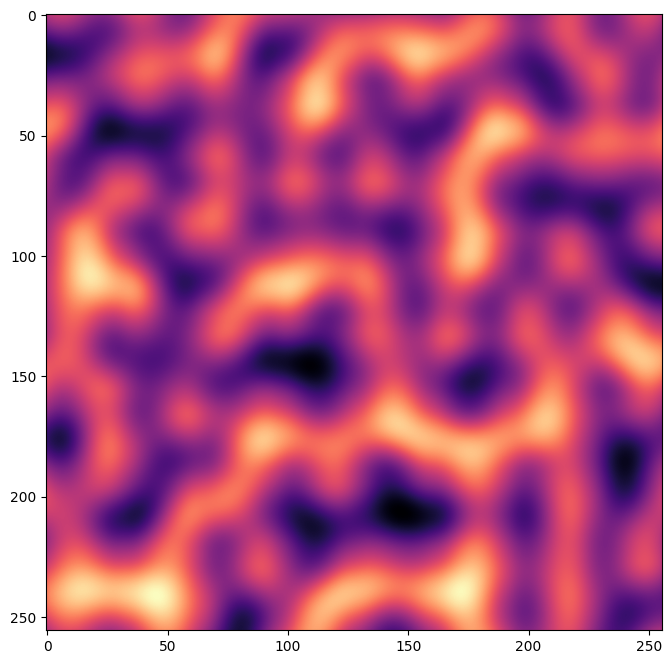

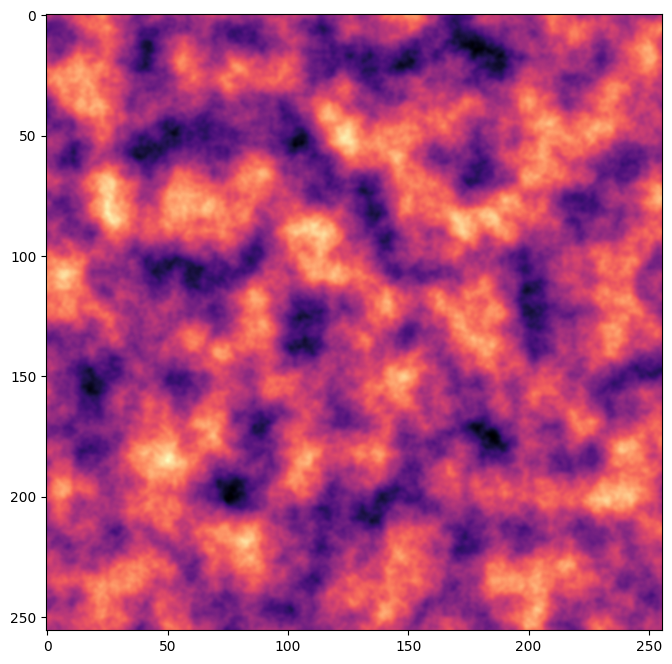

In [6]:
from perlin_numpy import generate_perlin_noise_2d, generate_fractal_noise_2d

np.random.seed(54)
noise = generate_perlin_noise_2d((256, 256), (8, 8))

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

np.random.seed(0)
noise = generate_fractal_noise_2d((256, 256), (8, 8), 5)

plt.figure(figsize=(8,8))
plt.imshow(noise, cmap='magma', interpolation='lanczos')

plt.show()

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML
from perlin_numpy import generate_perlin_noise_3d

np.random.seed(0)
noise = generate_perlin_noise_3d(
    (32, 256, 256), (1, 4, 4), tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]

anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())

In [19]:
from perlin_numpy import generate_fractal_noise_3d

np.random.seed(0)
noise = generate_fractal_noise_3d(
    (32, 256, 256), (1, 4, 4), 4, tileable=(True, False, False)
)

fig = plt.figure()
images = [
    [plt.imshow(
        layer, cmap='magma', interpolation='lanczos', animated=True
    )]
    for layer in noise
]
anim = animation.ArtistAnimation(fig, images, interval=50, blit=True)

# plt.show()
plt.close()
HTML(anim.to_html5_video())

In [34]:
!pip install opensimplex

[0.00524175 0.53509895 0.10173634 0.82264387 0.51175306 0.31568757
 0.84249153 0.03697767 0.66508258 0.59240304 0.90618261 0.49378756
 0.54342811 0.68127546 0.19501665 0.4071047  0.35261491 0.59966243
 0.5950888  0.21810372 0.43506263 0.70372837 0.05491183 0.49102757
 0.25171535 0.64435605 0.03990028 0.77489574 0.19407343 0.27910702
 0.82474174 0.71418156 0.90774712 0.96935143 0.92470468 0.30037185
 0.87401741 0.96028843 0.34729162 0.37235386 0.32941065 0.54083252
 0.83401915 0.52345021 0.20112883 0.90198595 0.77165802 0.46421873
 0.75760235 0.86928919 0.8314553  0.49028843 0.98740129 0.47387855
 0.9850727  0.45979085 0.97538256 0.32471709 0.95841235 0.85389455
 0.39653737 0.18055522 0.01937741 0.20934184 0.46008229 0.11623267
 0.70379461 0.57199797 0.04851174 0.5941656  0.76011343 0.60483327
 0.81267525 0.95794683 0.21097453 0.09068254 0.3794853  0.633153
 0.51184037 0.07347773 0.9507773  0.20826394 0.75413771 0.40642449
 0.55323888 0.36141022 0.91516294 0.32007131 0.78407601 0.787962

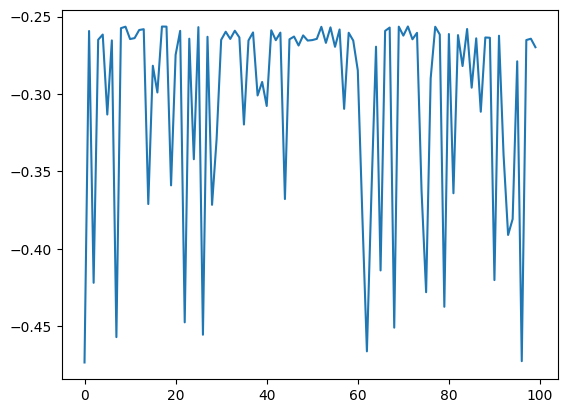

In [46]:
import opensimplex

ix, iy = rng.random(100), rng.random(1)

# print(ix)

random_arrays = opensimplex.noise2array(ix, iy)

# print(random_arrays)

samples = np.arange(100)

plt.plot(samples , random_arrays[0])
plt.show()

In [53]:
n = opensimplex.noise2(x=1, y=1)
print(n)

xoff = 0.0

# def noise(x, y):
    
#     xoff = 
    
    
# for i in range(10):
    

-0.14548105016760723


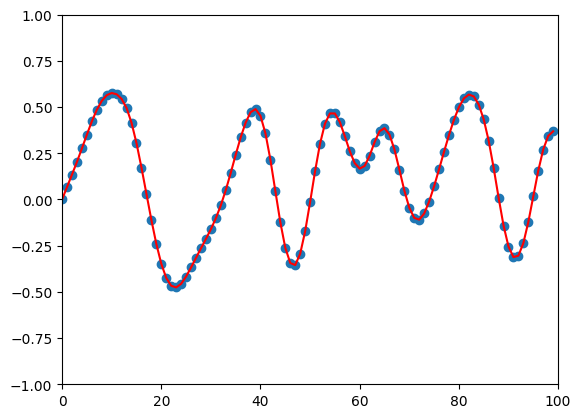

In [56]:
noise = opensimplex.OpenSimplex(seed=10)
n = 100 # Number of values
x = [i for i in range(n)] # List of numbers from 0 to 99

y = []
for i in np.linspace(0, 10, n): # Create 100 point from 0 to 10
    y.append(noise.noise2(i, 0))

plt.xlim((0, n))
plt.ylim((-1, 1))
plt.scatter(x, y)
plt.plot(x, y, 'r')
plt.show()